<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Default Prediction

Predict whether a customer will default on their payments.

- Link to Kaggle Challenge: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
- Type: Binary Classification

## But what is defaulting?

According to [valuepenguin](https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan), "defaulting on a loan happens when repayments aren't made for a certain period of time. When a loan defaults, it is sent to a debt collection agency whose job is to contact the borrower and receive the unpaid funds. Defaulting will drastically reduce your credit score, impact your ability to receive future credit, and can lead to the seizure of personal property."

## Imports and Constants

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
FIGSIZE = (12, 10)
DATA_PATH = 'https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_09%20-%20Support%20Vector%20Machines/UCI_Credit_Card.csv'

pd.set_option('display.max_columns', None)
plt.rc('figure', figsize=FIGSIZE)
sns.set_style('whitegrid')

## Get the data

In [ ]:
df = pd.read_csv(DATA_PATH)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.columns = df.columns.str.replace('default.payment.next.month', 'default', regex=False)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## Exploratory Data Analysis

### Overall Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

All columns are numeric!

In [ ]:
df.isna().mean()

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_0        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
dtype: float64

There are no missing values!

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Target Distribution

In [ ]:
df['default'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

There is a big class imbalance.

### Unique Values

In [ ]:
for col in df.columns:
    unq = df[col].unique()
    len_unq = len(unq)
    
    print(f'{col:15} | {len_unq:10} | {unq if len_unq < 15 else ""}')

ID              |      30000 | 
LIMIT_BAL       |         81 | 
SEX             |          2 | [2 1]
EDUCATION       |          7 | [2 1 3 5 4 6 0]
MARRIAGE        |          4 | [1 2 3 0]
AGE             |         56 | 
PAY_0           |         11 | [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2           |         11 | [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3           |         11 | [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4           |         11 | [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5           |         10 | [-2  0 -1  2  3  5  4  7  8  6]
PAY_6           |         10 | [-2  2  0 -1  3  6  4  7  8  5]
BILL_AMT1       |      22723 | 
BILL_AMT2       |      22346 | 
BILL_AMT3       |      22026 | 
BILL_AMT4       |      21548 | 
BILL_AMT5       |      21010 | 
BILL_AMT6       |      20604 | 
PAY_AMT1        |       7943 | 
PAY_AMT2        |       7899 | 
PAY_AMT3        |       7518 | 
PAY_AMT4        |       6937 | 
PAY_AMT5        |       6897 | 
PAY_AMT6        |       6939 | 
defau

In [ ]:
unqs = { col: len(df[col].unique()) for col in df.columns }
unqs = sorted(unqs.items(), key=lambda x: x[1])
unqs

[('SEX', 2),
 ('default', 2),
 ('MARRIAGE', 4),
 ('EDUCATION', 7),
 ('PAY_5', 10),
 ('PAY_6', 10),
 ('PAY_0', 11),
 ('PAY_2', 11),
 ('PAY_3', 11),
 ('PAY_4', 11),
 ('AGE', 56),
 ('LIMIT_BAL', 81),
 ('PAY_AMT5', 6897),
 ('PAY_AMT4', 6937),
 ('PAY_AMT6', 6939),
 ('PAY_AMT3', 7518),
 ('PAY_AMT2', 7899),
 ('PAY_AMT1', 7943),
 ('BILL_AMT6', 20604),
 ('BILL_AMT5', 21010),
 ('BILL_AMT4', 21548),
 ('BILL_AMT3', 22026),
 ('BILL_AMT2', 22346),
 ('BILL_AMT1', 22723),
 ('ID', 30000)]

The features with less than 15 unique values may be actually categorical. `SEX` and `default` are examples of such columns.

For the others we'll reference the dataset description:

- `MARRIAGE`: 1=married, 2=single, 3=others
- `EDUCATION`: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- `PAY_i`: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above

For `MARRIAGE` and `EDUCATION` there is no clear relationship between all values. Hence, we'll one-hot encode them.

The `PAY_i` feature seems to be a good candidate for ordinal encoding. The official description does not say what `-2` means. We'll assume it means something and we'll keep these features as they are.

### Investigate low-cardinality columns

In [ ]:
low_cardinality_cols = ['SEX', 'MARRIAGE', 'EDUCATION', 'PAY_5', 'PAY_6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4']

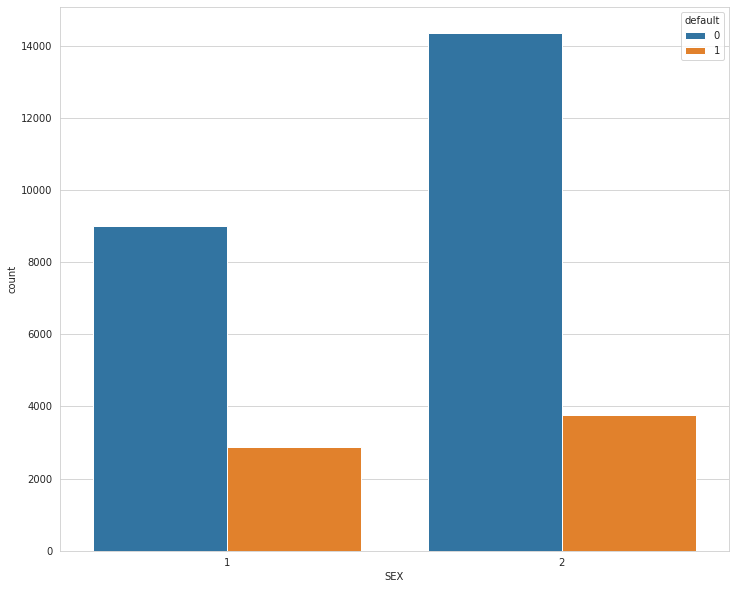

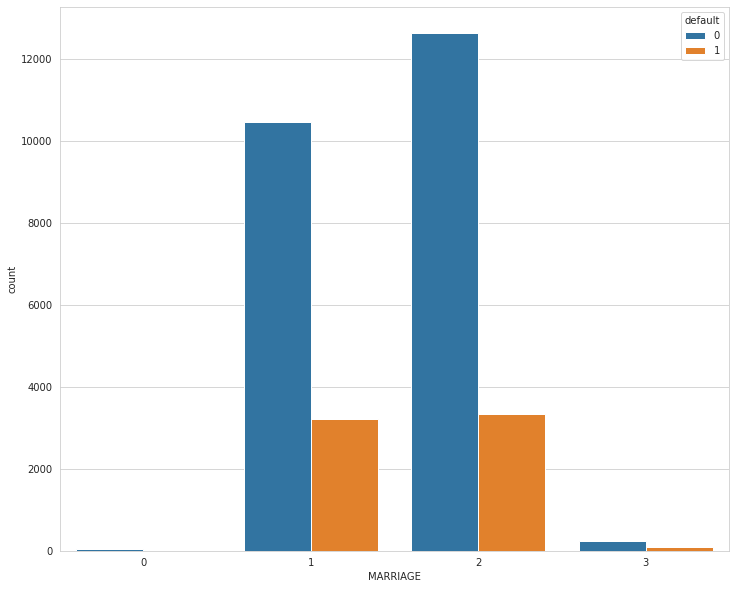

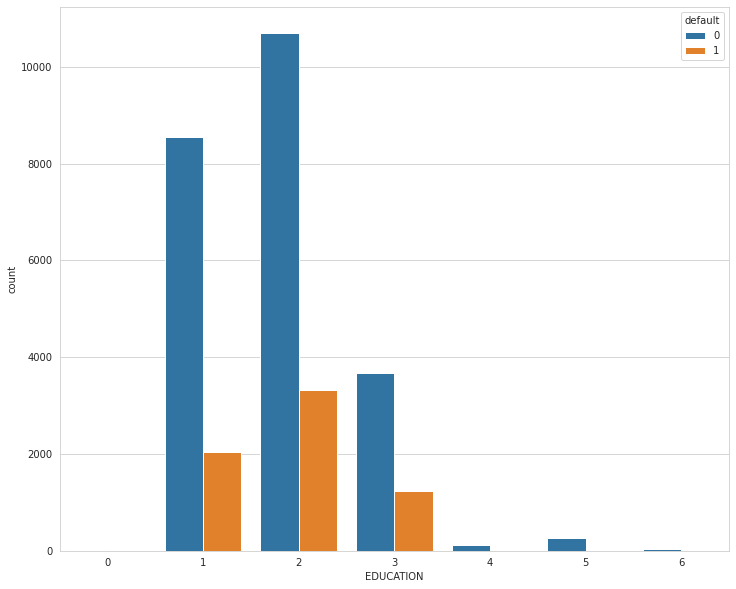

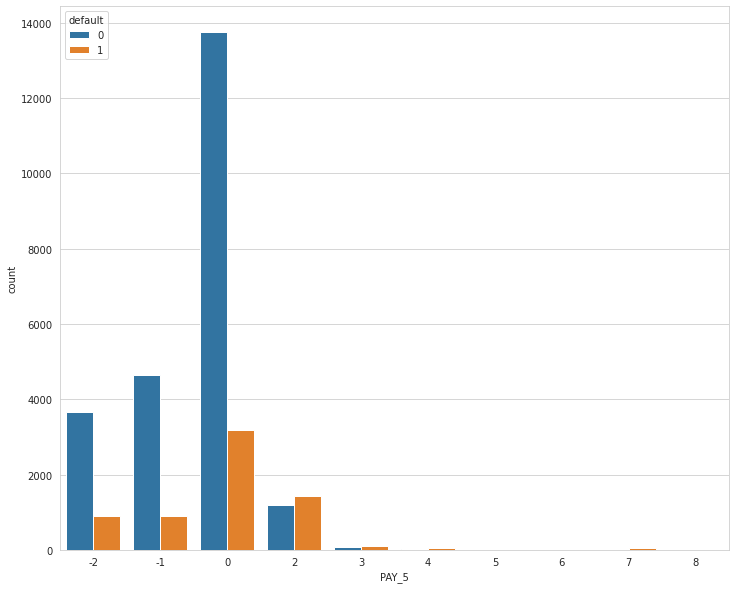

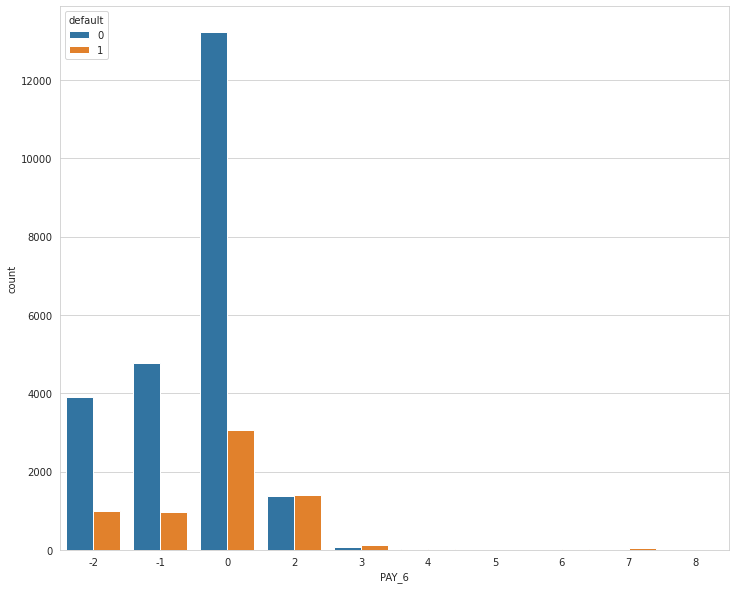

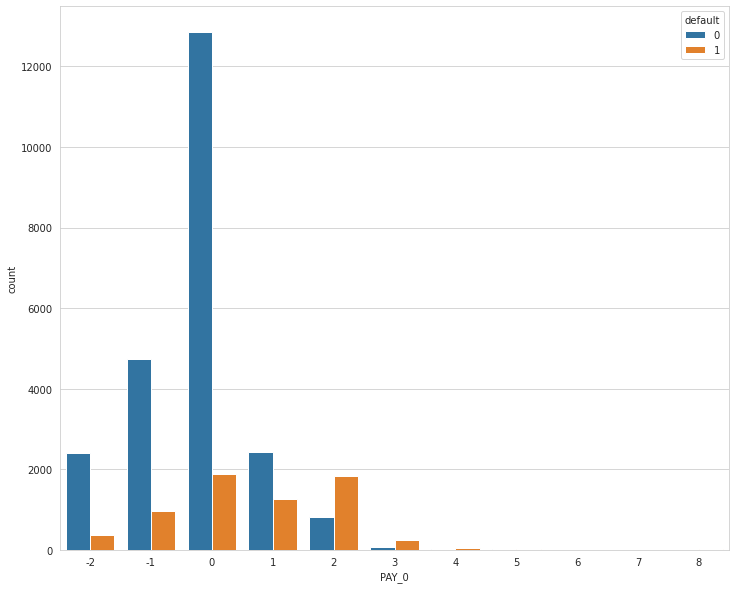

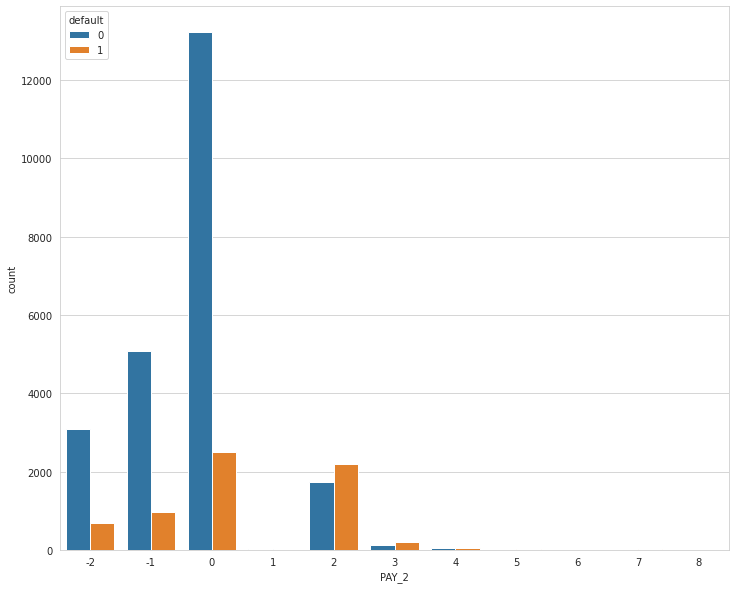

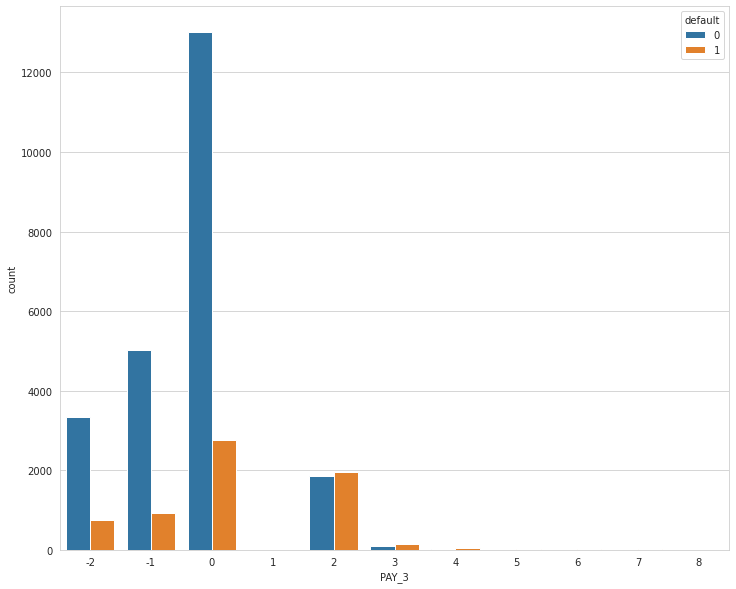

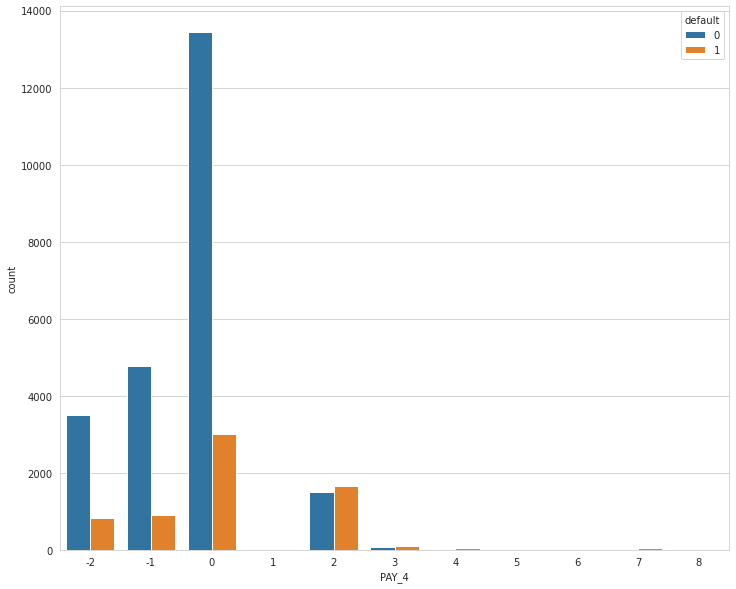

In [ ]:
for col in low_cardinality_cols:
    sns.countplot(data=df, x=col, hue='default')
    plt.show()

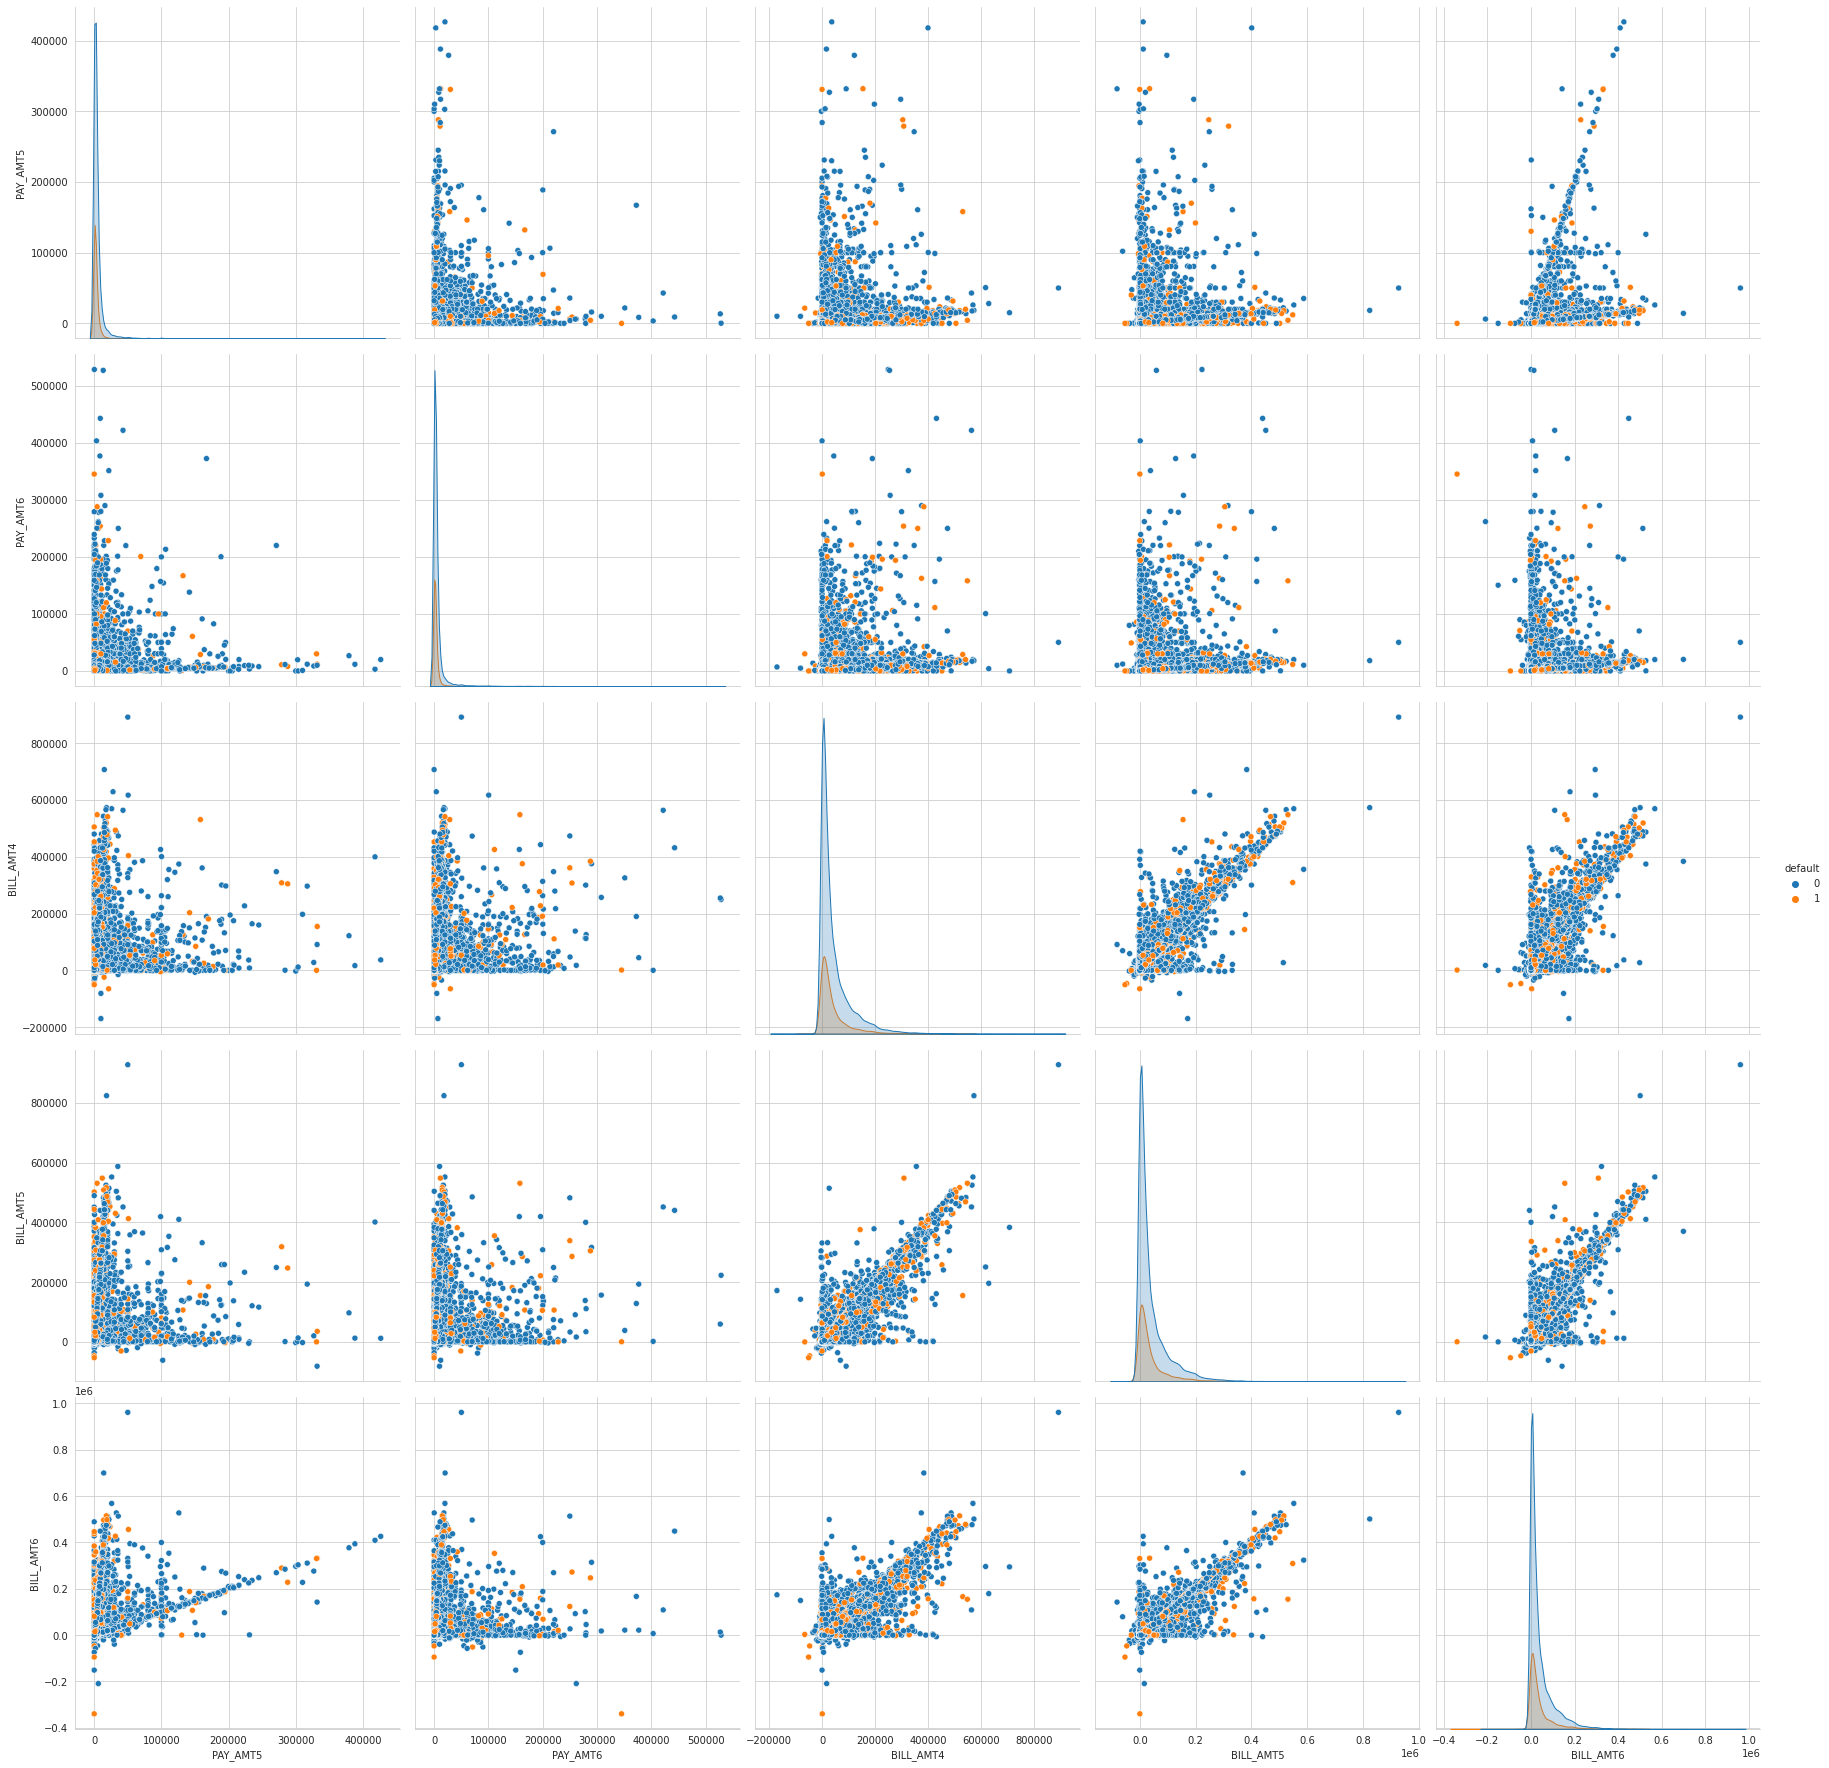

In [ ]:
ax = sns.pairplot(df[['PAY_AMT5', 'PAY_AMT6', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default']], hue='default', height=5)

### Investigate the `BILL_AMT5` column

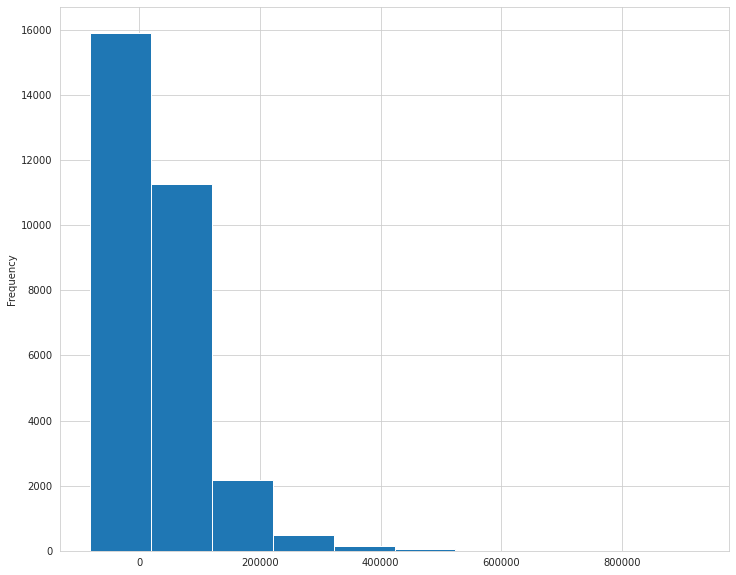

In [ ]:
ax = df['BILL_AMT5'].plot(kind='hist')

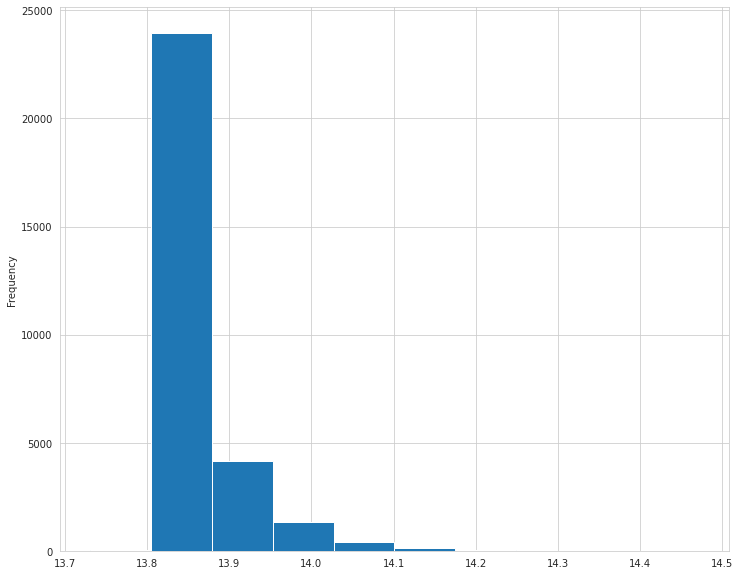

In [ ]:
ax = np.log1p(df['BILL_AMT5'] + 1000000).plot(kind='hist')

### Which columns will benefit from a log-transform?

In [ ]:
for col in df.columns:
    skewness = df[col].skew()
    std = df[col].std()
    
    l_skewness = np.log1p(df[col]).skew()
    l_std = np.log1p(df[col]).std()
    
    if skewness > 0.5 and np.abs(l_skewness) <= 0.5:
        print(f'{col:10} | Skw: {skewness:10.2f} => {l_skewness:.2f}')
    
    if std > 1 and l_std <= 1:
        print(f'{col:10} | Std: {std:10.2f} => {l_std:.2f}')

ID         | Std:    8660.40 => 1.00
LIMIT_BAL  | Std:  129747.66 => 0.94
EDUCATION  | Skw:       0.97 => 0.19
AGE        | Skw:       0.73 => 0.26
AGE        | Std:       9.22 => 0.24


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Columns that will benefit from a log transform: `LIMIT_BAL`, `AGE`. We don't consider `EDUCATION` since it's not a numeric feature.

## Data Cleaning

In [ ]:
def preprocess_inputs(df, ret_X_y=False):
    df = df.copy()
    
    # Drop high-cardinality ID column
    df = df.drop('ID', axis=1)
    
    # Log-transform LIMIT_BAL
    df['LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'])
    
    # Subtract 1 from each entry in the SEX column, so as to make it one-hot encoded
    df['SEX'] -= 1
    
    # Encode categorical features
    for col in ['EDUCATION', 'MARRIAGE']:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
    
    # Target transformation: Make it 1 and -1
    df.loc[df['default'] == 0, ['default']] = -1
    
    y = df['default']
    X = df.drop('default', axis=1)
    
    scaler = StandardScaler()
    
    if ret_X_y:
        scaler = scaler.fit(X)
        X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
        return X, y
    
    return df

In [ ]:
X, y = preprocess_inputs(df, ret_X_y=True)
X.describe()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,1.191114e-15,-1.601398e-14,-7.286024e-17,-7.559566e-17,-1.586202e-15,-1.135055e-16,-3.630355e-15,-7.266021e-16,-4.965398e-15,3.868410e-17,-4.926489e-16,-6.192313e-16,-7.830112e-16,6.249362e-16,-2.022493e-16,-4.717060e-17,-3.368787e-16,-1.300675e-15,-1.950606e-16,-2.968200e-16,-5.318801e-17,1.255237e-15,-4.276350e-15,7.212971e-16,-3.849795e-15,-7.973458e-15,1.023328e-14,-8.469780e-16,8.357259e-16,-3.263774e-15,-1.525520e-15,6.912064e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.606061e+00,-1.234323e+00,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,-1.530046e+00,-1.486041e+00,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,-2.160751e-02,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,-1.066471e+00,-1.043257e-01
25%,-8.959872e-01,-1.234323e+00,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,-6.475648e-01,-6.164517e-01,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,-2.160751e-02,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,-1.066471e+00,-1.043257e-01
50%,1.980534e-01,8.101607e-01,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,-2.160751e-02,-7.383746e-01,-9.372952e-01,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,-9.142609e-01,9.376717e-01,-1.043257e-01
75%,7.707778e-01,8.101607e-01,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,2.531374e-01,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,-2.160751e-02,1.354326e+00,1.066900e+00,-4.427518e-01,-6.416291e-02,-9.706320e-02,-4.126615e-02,-4.246464e-02,1.093780e+00,9.376717e-01,-1.043257e-01
max,2.287202e+00,8.101607e-01,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,7.294767e+00,7.209850e+00,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,4.628020e+01,1.354326e+00,1.066900e+00,2.258602e+00,1.558533e+01,1.030257e+01,2.423294e+01,2.354900e+01,1.093780e+00,9.376717e-01,9.585367e+00


## Model building

In [ ]:
scores = cross_validate(SVC(probability=True), X, y, cv=5, scoring=('neg_log_loss', 'roc_auc', 'f1'), n_jobs=-1)
print(f"Mean Roc: {scores['test_roc_auc'].mean()}")
print(f"Mean Neg Log Loss: {scores['test_neg_log_loss'].mean()}")
print(f"Mean F1: {scores['test_f1'].mean()}")

Mean Roc: 0.7170960831050021
Mean Neg Log Loss: -0.45745508661348033
Mean F1: 0.44650825821752615


In [ ]:
scores = cross_validate(LogisticRegression(), X, y, cv=5, scoring=('neg_log_loss', 'roc_auc', 'f1'), n_jobs=-1)
print(f"Mean Roc: {scores['test_roc_auc'].mean()}")
print(f"Mean Neg Log Loss: {scores['test_neg_log_loss'].mean()}")
print(f"Mean F1: {scores['test_f1'].mean()}")

Mean Roc: 0.7241821586315417
Mean Neg Log Loss: -0.46539854495019856
Mean F1: 0.36041581774109865


## Hyperparameter tuning - takes very long

In [ ]:
params={
    "C":[0.01, 0.1, 1, 10, 100],
    "degree":[0, 1, 2, 3, 4, 5, 10],
    "gamma":['scale', 'auto'],
}

clf = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=params,
    scoring='neg_log_loss',
    verbose=3
)

clf.fit(X,y)

# For home

Try out classifiers on this dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data